<a href="https://colab.research.google.com/github/tuvietnamm/victoria-electricity/blob/main/EDA_Project_Electricity_2015_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project title: Daily Electricity Price and Demand in Victoria, Australia

## Introduction
Victoria, being the second most populous state in Australia, hosts a bustling energy landscape. This dataset we're diving into provides a goldmine of daily information, allowing us to navigate through the highs and lows of daily electricity demand and the corresponding price fluctuations as well as weather information.
Victoria's a busy place, and we've got a bunch of daily data to help us uncover the patterns.

### About This Dataset
This dataset covers 2106 days of electricity demand in Victoria state, Australia from 01/01/2015 to 06/10/2020.
Below is a brief description of the data:

- `date` : datetime, the date of the recording

- `demand` : float, a total daily electricity demand in MWh.

- `RRP` : float, a recommended retail price in AUD$/MWh

- `demand_pos_RRP` : float, a total daily demand at

  `positive RRP` in MWh

- `RRP_positive` : float, an averaged positive RRP, weighted by the corresponding intraday demand in AUD$/ MWh

- `demand_neg_RRP` : float, a total daily demand at negative RRP in MWh
- `RRP_negative` : float, an average negative RRP, weighted by the corresponding intraday demand in AUD$ / MWh
- `frac_at_neg_RRP` : float, a fraction of the day when the demand was traded at negative RRP
- `min_temperature` : float, minimum temperature during the day in Celsius
- `max_temperature` : float, maximum temperature during the day in Celsius
- `solar_exposure` : float, total daily sunlight energy in MJ/m^2
- `rainfall` : float, daily rainfall in mm
- `school_day` : boolean, if students were at school on that day
- `holiday` : boolean, if the day was a state or national holiday

### Objectives
 To understand the variation of electricity price over the year by exploring the below factors:

       (1) Demand
       (2) Weather: Temperatures, Seasons
       (3) Holiday and Schooldays

## Data Preparation
In this section, we will import the necessary libraries, check missing values, duplicates or wrong data types before we can proceed with the EDA process.

### Import data and libraries

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
sns.set(style="darkgrid")

In [ ]:
#Import the dataset
df = pd.read_csv('/content/drive/MyDrive/10-19 Learning Data/11 DA - Coding Mentor /11.02 Python EDA Project/electricity.csv')

### Dataframe Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


The dataset is very good with only a few missing values in `rainfall` and `solar_exposure`. We will fill in these missing
values in later section. Let's have a quick look at the first 5 entries of this dataframe:

In [ ]:
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [ ]:
#the shape of the dataframe
df.shape

(2106, 14)

In [ ]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


As showed in the above statistical table, we can quickly notice that there are outliers in `RRP`, `RRP_positive` & `demand_neg_RRP`. These outliers will need further investigation due to their potential influence on the overall data distribution and subsequent analysis.

A notable observation is the close proximity of the _median_ and _mean_ values in `demand` attribute suggesting a potential normal distribution, this will be explored further in the distribution analysis. The coherence between the _median_ and _mean_ values indicates a central tendency.

### Checking duplicated values

In [ ]:
df.duplicated().sum()

0

There is no duplicated value in this dataset.

###  Checking null values

In [ ]:
df.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

The dataset only has 1 missing value in `solar_exposure` and 3 missing values in `rainfall`. Let's find out what are the rows with missing values:

In [ ]:
df[df.isnull().any(axis=1)]

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
161,2015-06-11,143465.445,37.481829,143465.445,37.481829,0.0,0.0,0.0,5.7,14.0,8.3,NaN,Y,N
1060,2017-11-26,108717.875,83.114514,108717.875,83.114514,0.0,0.0,0.0,19.4,28.3,NaN,3.4,Y,N
1377,2018-10-09,116449.310,99.000749,116449.310,99.000749,0.0,0.0,0.0,16.1,17.9,7.2,NaN,Y,N
1378,2018-10-10,109551.080,73.539698,109551.080,73.539698,0.0,0.0,0.0,10.1,16.5,20.0,NaN,Y,N


Rather than removing the data entries with missing values, we are going to fill in those missing values with the corresponding attributes' _median_ values since _median_ value has the least infuence on the overall data distribution.

### Fill in missing values


In this section, we will find the median values for `rainfall` and `solar_exposure` and fill in the corresponding rows with missing values

In [ ]:
#Find median values
median_rainfall = df['rainfall'].median()
median_solar_exposure = df['solar_exposure'].median()
#Fill in with median values
df['rainfall'].fillna(median_rainfall, inplace = True)
df['solar_exposure'].fillna(median_solar_exposure, inplace = True)
df[df.isnull().any(axis=1)]
#Check null values again
df.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

The dataset is now cleaned, missing values are filled and we are now ready for data exploratory analysis.

## Exploratory Data Analysis

### Adding Needed Features
In order to understand the variation of pricing over the time, we will need to extract the data from the `date` feature. Since it is an _object_ data type, we need to change it to timestamp type and extract it to create the neccessary features below:
- `week_day`
- `month`
- `year`

In [ ]:
# Change date to timestamp data type
df['date'] = pd.to_datetime(df['date'])
# create new columns: week_day, month, year
df['week_day'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   demand           2106 non-null   float64       
 2   RRP              2106 non-null   float64       
 3   demand_pos_RRP   2106 non-null   float64       
 4   RRP_positive     2106 non-null   float64       
 5   demand_neg_RRP   2106 non-null   float64       
 6   RRP_negative     2106 non-null   float64       
 7   frac_at_neg_RRP  2106 non-null   float64       
 8   min_temperature  2106 non-null   float64       
 9   max_temperature  2106 non-null   float64       
 10  solar_exposure   2106 non-null   float64       
 11  rainfall         2106 non-null   float64       
 12  school_day       2106 non-null   object        
 13  holiday          2106 non-null   object        
 14  week_day         2106 non-null   int64  

### Data Range and Distribution
 Let have an overview of the distributions for the main features in this dataframe:

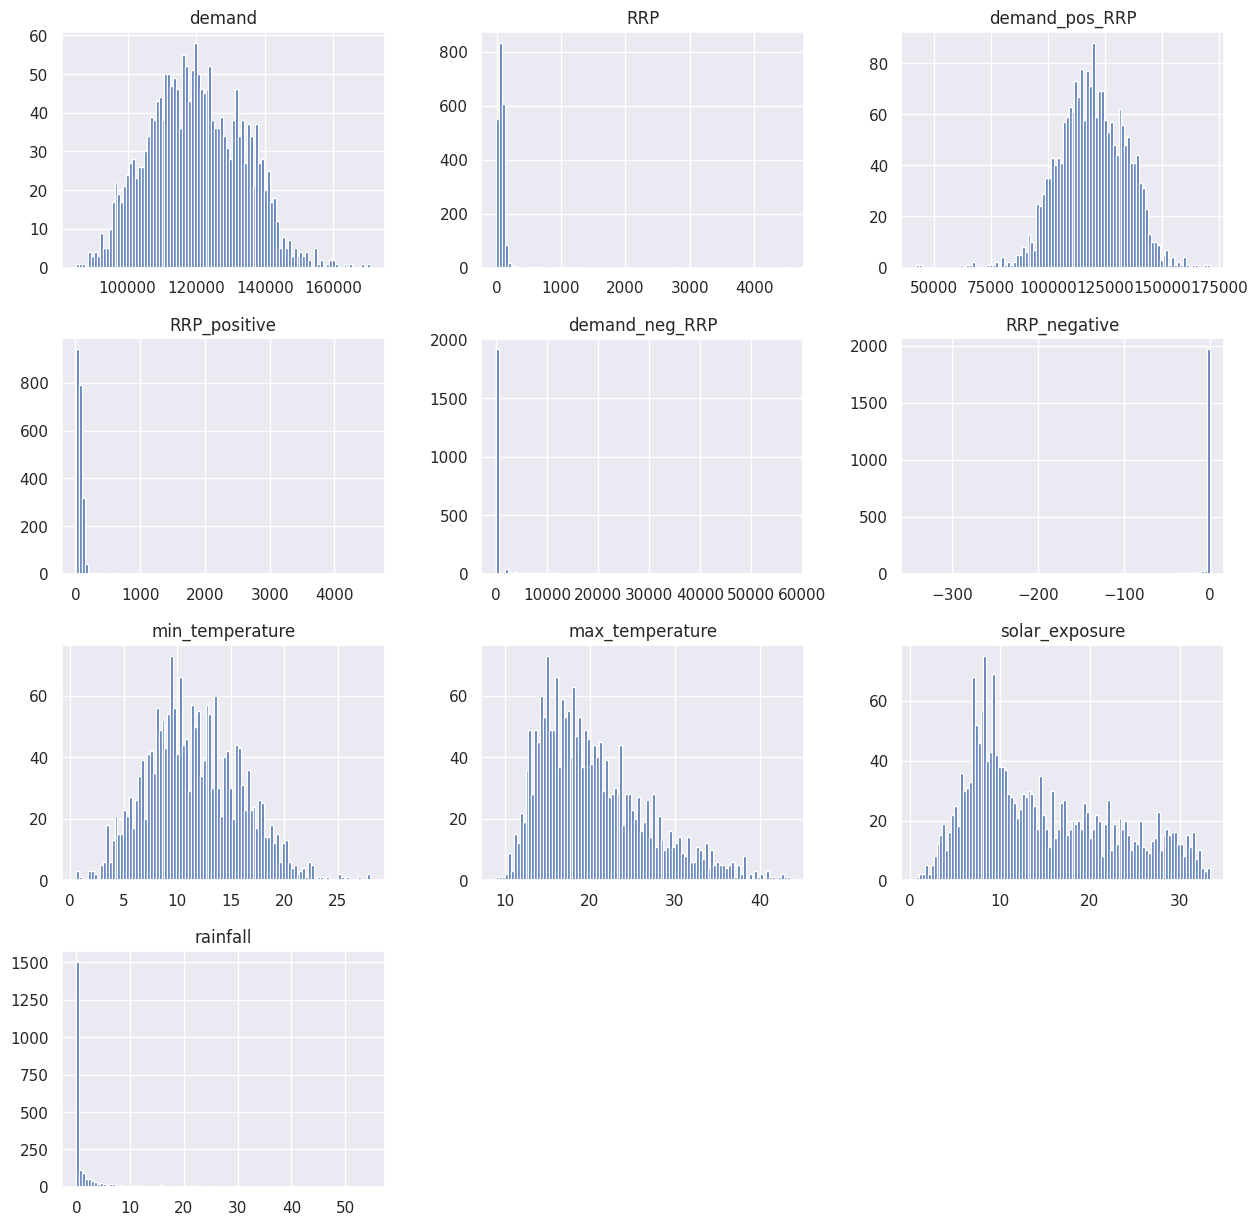

In [ ]:
#selected features
features = ['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall' ]
# Plot histograms
df[features].hist(bins=100, figsize=(15, 15))
plt.show()

The distributions of `demand`, `demand_pos_RRP`, and `min_temperature` exhibit characteristics indicative of a normal distribution.
On the contrary, `RRP`, `RRP_positive`, `demand_pos_RRP`, `max_temperature`, `solar_exposure`, and `rainfall` display right-skewed distributions, with notable emphasis on `RRP`, `RRP_positive`, `demand_neg_RRP`, and `rainfall`.
Particularly, `demand_neg_RRP` stands out as highly left-skewed, which will need further investigation.

### Checking Outliers
In this section, we will calculate the IQR for each numerical column in order to find the lower bound and upper bound to determine the potential outliers in the dataset.

In [ ]:
summary_stats = df.describe()
# Calculate IQR for each numerical column
iqr_values = summary_stats.loc['75%'] - summary_stats.loc['25%']
# Display IQR values
print("IQR for Numerical Columns:")
print(iqr_values)
lower_bounds = summary_stats.loc['25%'] - 1.5 * iqr_values
upper_bounds = summary_stats.loc['75%'] + 1.5 * iqr_values
# Display lower and upper bounds
print("\nLower Bounds for Numerical Columns:")
print(lower_bounds)
print("\nUpper Bounds for Numerical Columns:")
print(upper_bounds)

IQR for Numerical Columns:
demand             20472.356250
RRP                   56.367973
demand_pos_RRP     20873.227500
RRP_positive          56.012820
demand_neg_RRP         0.000000
RRP_negative           0.000000
frac_at_neg_RRP        0.000000
min_temperature        6.100000
max_temperature        8.375000
solar_exposure        12.500000
rainfall               0.800000
week_day               4.000000
month                  6.000000
year                   3.000000
dtype: float64

Lower Bounds for Numerical Columns:
demand             79255.115625
RRP                  -45.844919
demand_pos_RRP     77936.408750
RRP_positive         -44.901869
demand_neg_RRP         0.000000
RRP_negative           0.000000
frac_at_neg_RRP        0.000000
min_temperature       -0.650000
max_temperature        2.962500
solar_exposure       -10.550000
rainfall              -1.200000
week_day              -5.000000
month                 -6.000000
year                2011.500000
dtype: float64

Upper Bou

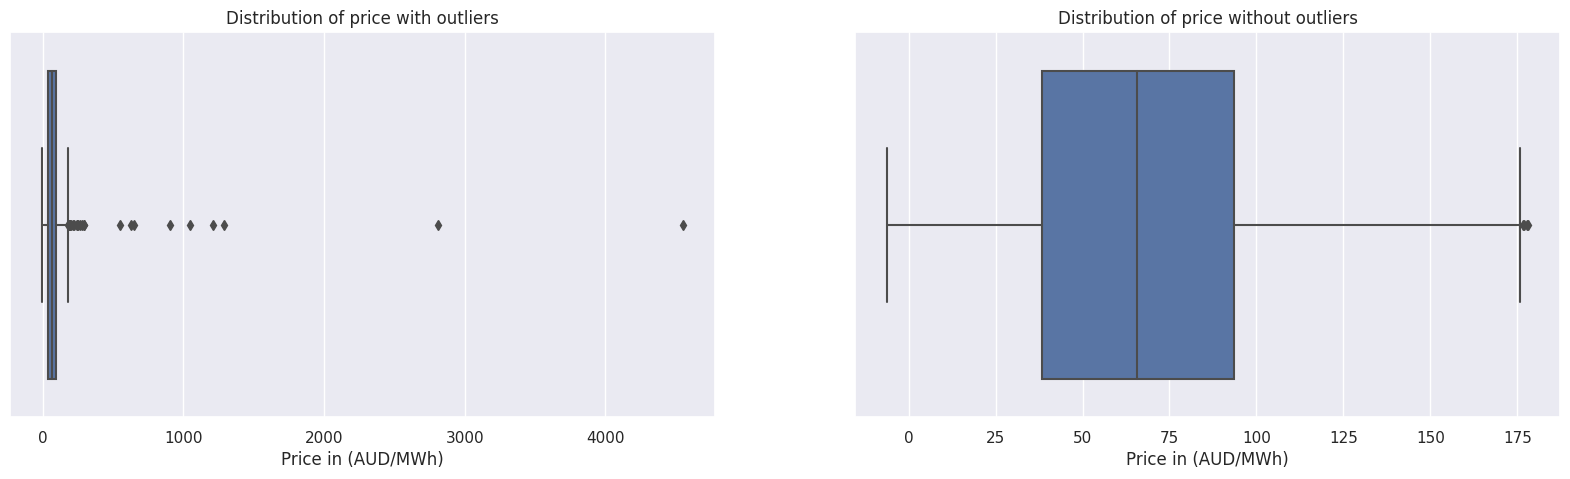

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.boxplot(x=df["RRP"])
g.set_title('Distribution of price with outliers')
g.set_xlabel(r"Price in (AUD/MWh)")
df_1=df.copy()

#quantile range
Q1 = df_1['RRP'].quantile(0.25)
Q3 = df_1['RRP'].quantile(0.75)
IQR = Q3 - Q1

#Removing outliers
df_1 = df_1[(df_1['RRP'] > (Q1 - 1.5 * IQR)) & (df_1['RRP'] < (Q3 + 1.5 * IQR))]
plt.subplot(1,2,2)
g1=sns.boxplot(x=df_1["RRP"])
g1.set_xlabel("Price in (AUD/MWh)")
g1.set_title('Distribution of price without outliers');

In [ ]:
#checking number of outliers
rrp_outliers = df.copy()
rrp_outliers = rrp_outliers[(rrp_outliers['RRP'] < (Q1 - 1.5 * IQR)) | (rrp_outliers['RRP'] > (Q3 + 1.5 * IQR))]
rrp_outliers.shape

(28, 17)

As showed in the left boxplot above, there are rare events of outliers (28) which have caused the RRP looks like prices were mostly low (right-skewed). By removing the outliers from the dataset we can see the RRP distribution is more even now (right figure).

## Visualisations

### Electricity Price Trend

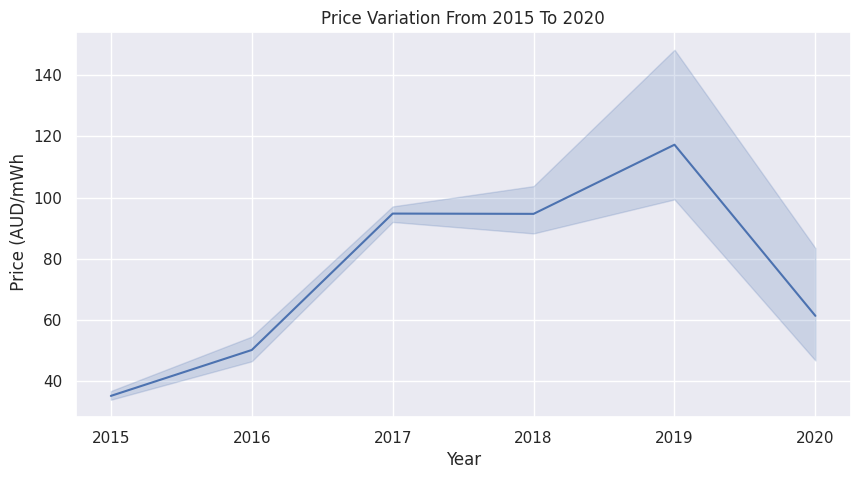

In [ ]:
plt.figure(figsize=(10, 5))
g =sns.lineplot(data=df, x='year', y='RRP')
g.set_title('Price Variation From 2015 To 2020')
g.set_xlabel('Year')
g.set_ylabel(' Price (AUD/mWh')
plt.show()

The trend in electricity prices over the period unveils an interesting pattern. Starting at a relatively low point in 2015, prices experienced a notable increase in 2016, followed by further increments in 2017. The year 2018 witnessed a period of stability with prices maintaining a flat trajectory. However, a significant spike occurred in 2019, reaching the highest point in the entire timeline.

Surprisingly, from 2019 to 2020, electricity prices took a big turn. They not only went down from the highest point in 01/2019 but also dropped even lower than the levels seen in 2017. This noticeable swing in prices shows how much they can change and how the electricity market has shifted over the years.

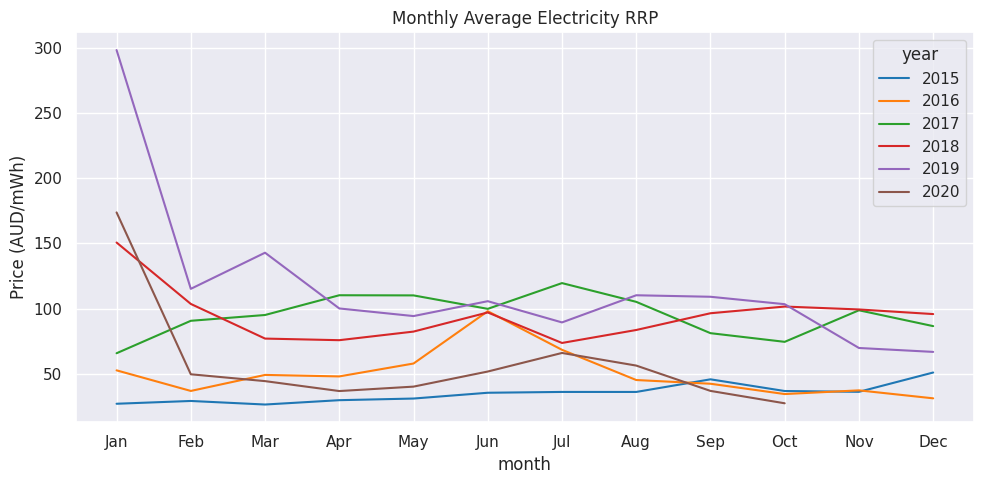

In [ ]:
plt.figure(figsize=(10,5))
avg_price = df.groupby(['month', 'year'])['RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
p1=sns.lineplot(data=df, x='month', y='RRP', hue='year', palette=colors, errorbar=None, legend=True)
p1.set_xticks(range(1, 13))
p1.set_ylabel("Price (AUD/mWh)")
p1.set_title('Monthly Average Electricity RRP')
p1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

Visualising the average price by month for each year, prices in January were significantly higher than the rest of the year. This could possibly due to high demand for electricity during summer season. Summer weather in Australia is from December to March with January is the hottest time of the year peaking at 37-40 degree Celcius.

Demand for air condition during the hot days could also reach its peak, both planned and unplanned outages might take place which led to high prices as shown above.

Interestingly, although prices were slightly higher during Winter from June to August, they were, however, far lower than that of Summer. We will analyse again after removing the outliers later.

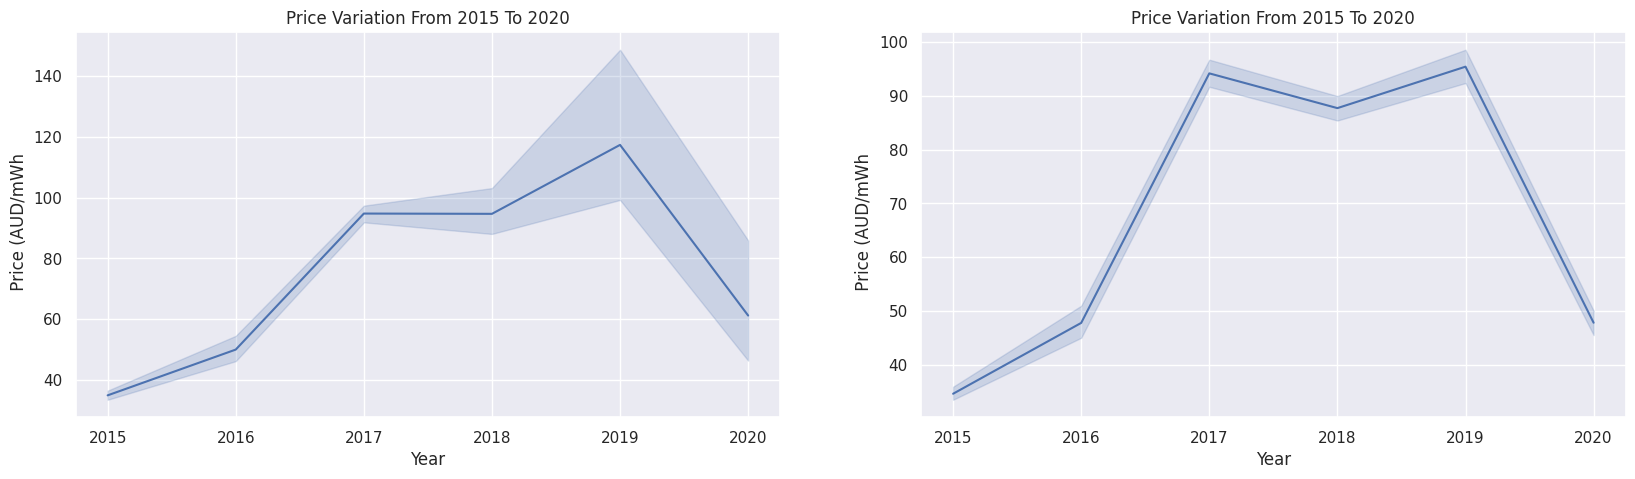

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g1 =sns.lineplot(data=df, x='year', y='RRP')
g1.set_title('Price Variation From 2015 To 2020')
g1.set_xlabel('Year')
g1.set_ylabel(' Price (AUD/mWh')
#without outliers
plt.subplot(1,2,2)
g2 =sns.lineplot(data=df_1, x='year', y='RRP')
g2.set_title('Price Variation From 2015 To 2020')
g2.set_xlabel('Year')
g2.set_ylabel(' Price (AUD/mWh')
plt.show()

Looking at the yearly trend with the outliers excluded from the dataset (right figure), there were an increasing price of power from 2015 to 2017 and followed by a slight decrease in 2018. Yet, falling significantly from 2019 to 2020.
Overall, prices increased gradually over the period 2015 to 2019 but fell rapidly in 2020.

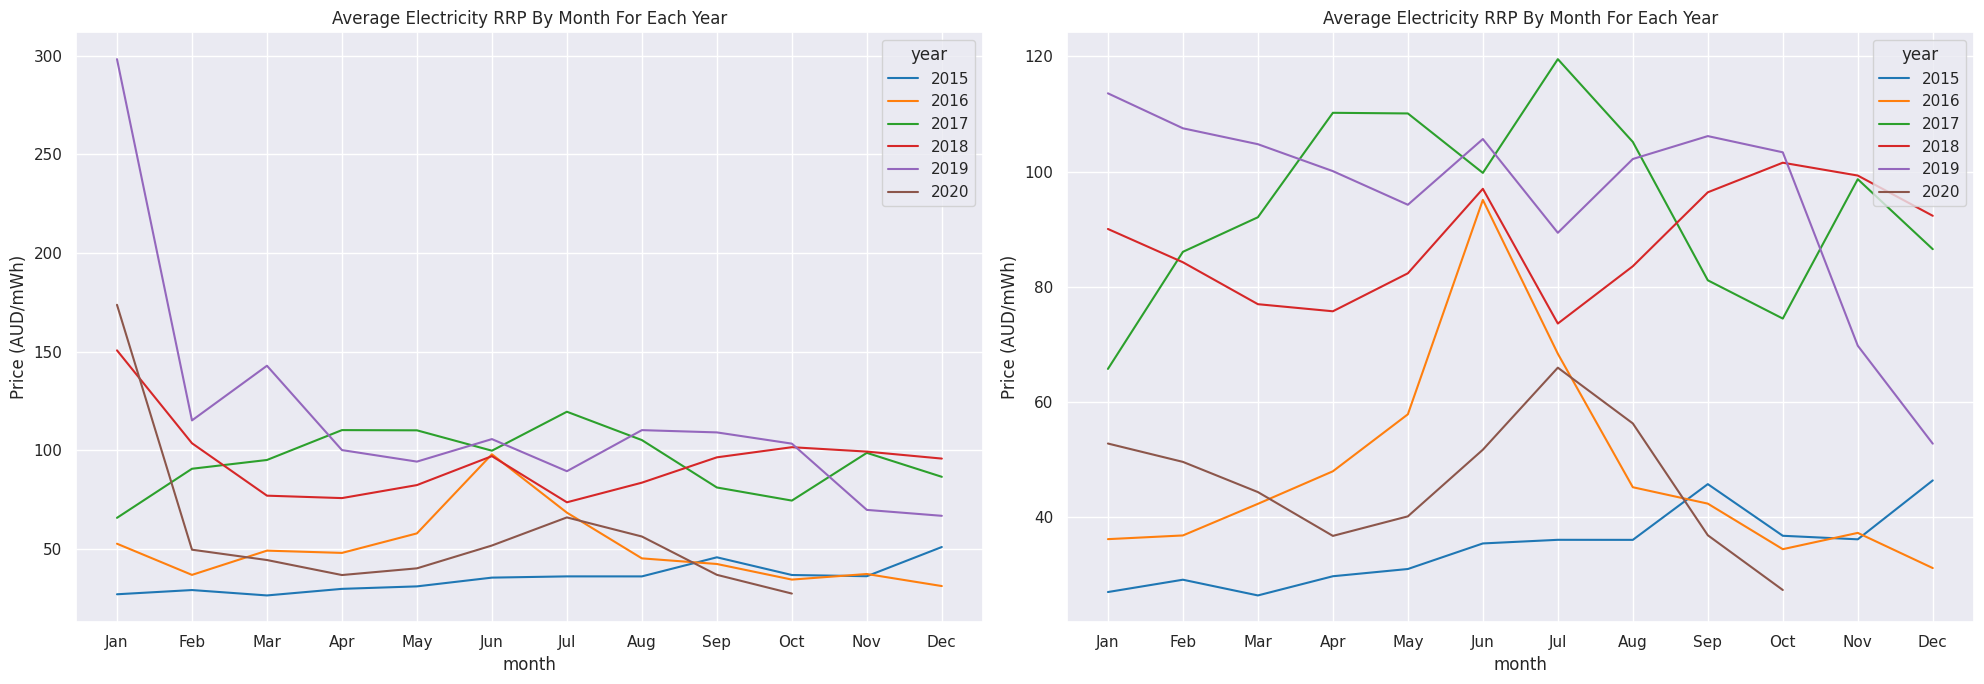

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
avg_price = df.groupby(['month', 'year'])['RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
p1=sns.lineplot(data=df, x='month', y='RRP', hue='year', palette=colors, errorbar=None, legend=True)
p1.set_xticks(range(1, 13))
p1.set_ylabel("Price (AUD/mWh)")
p1.set_title('Average Electricity RRP By Month For Each Year')
p1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#without outliers
plt.subplot(1,2,2)
colors= sns.color_palette("tab10", n_colors=6)
p1=sns.lineplot(data=df_1, x='month', y='RRP', hue='year', palette=colors, errorbar=None, legend=True)
p1.set_xticks(range(1, 13))
p1.set_ylabel("Price (AUD/mWh)")
p1.set_title('Average Electricity RRP By Month For Each Year')
p1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

It is clear that the outliers in prices have made the chart looks like prices in January were too high compared to the rest. After removing outliers (right line chart), we can see a more consistent pattern that is high prices in Winter and Summer time with Winter's slightly higher.

The month June saw huge spikes in 2016, 2018, 2019 while prices in 2017 and 2020 peaked in July. This could be due to seasonal variation which we will investigate in later section.

### Electricity Demand Variation

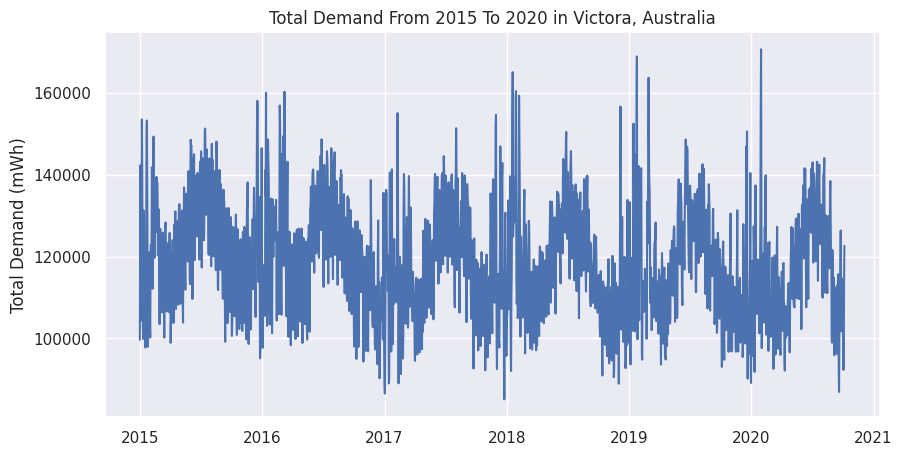

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['demand'], linestyle='-')
plt.title('Total Demand From 2015 To 2020 in Victora, Australia')
plt.ylabel('Total Demand (mWh)')
plt.show()

From this graph of total electricity demand for the period, we can see an upward trend for the maximum daily electricity demand.

Specifically, it's noting that, there is a clear pattern of escalating maximum daily power demand from the year 2015 to 2020. This could imply a growing need for electricity or changing behaviors in consuming power over the specified time period.

Let's find out the total demand over the period.

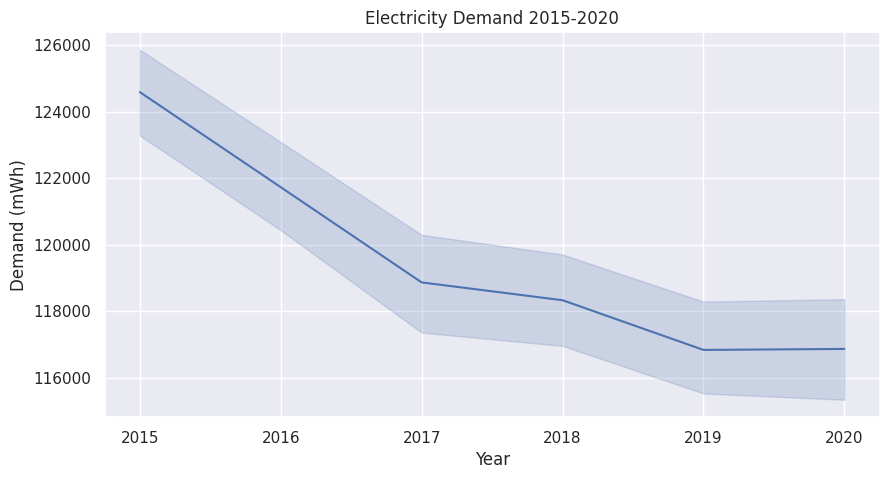

In [ ]:
plt.figure(figsize=(10, 5))
d=sns.lineplot(data=df_1, x='year', y='demand')
d.set_ylabel('Demand (mWh)')
d.set_xlabel('Year')
d.set_title('Electricity Demand 2015-2020');

The line chart representing electricity demand from 2015 to 2020 shows a distinctive pattern. Starting with its peak in 2015, demand exhibited a downward trend in 2016, followed by a further decrease in 2017. The year 2018 witnessed a marginal decline, and from that point onward, demand gradually decreased.

The inverse relationship between demand and price trends is apparent. This suggests a potential correlation between lower demand and the observed variations in electricity prices.

__Disclaimer__: In this analysis, it's important to note that the dataset only contains data until 06/10/2020, and therefore, the observations and trends discussed are reflective of this limited time frame.

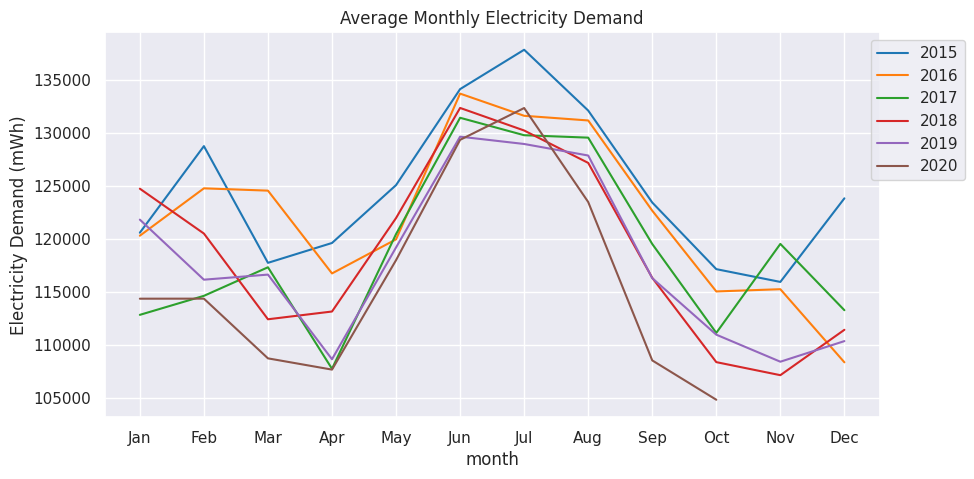

In [ ]:
plt.figure(figsize=(10, 5))
Average_monthly_demand = df.groupby(['month', 'year'])['demand'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df, x='month', y='demand', hue='year', palette=colors, errorbar=None)
g.set_xticks(range(1, 13))
g.set_title('Average Monthly Electricity Demand')
g.set_xlabel('month')
g.set_ylabel('Electricity Demand (mWh)')
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

The above graph shows a consistent high demand for electricity between June and August (winter period) from 2015 to 2020 following by a rapid decrease until November and then climbed up until January (summer period)

This could possibly explain the high price variation for these periods in previous charts.

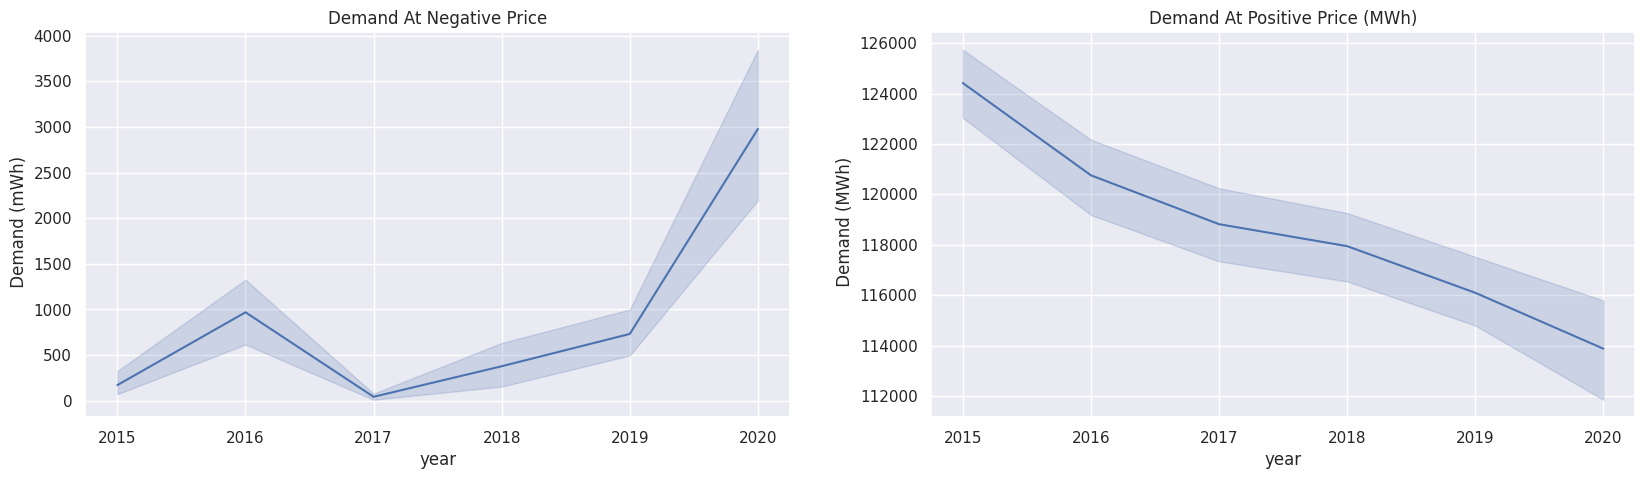

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='year', y='demand_neg_RRP')
g.set_ylabel(' Demand (mWh)')
g.set_title('Demand At Negative Price')
g.set_xlabel('year')

plt.subplot(1,2,2)
g=sns.lineplot(data=df_1, x='year', y='demand_pos_RRP')
g.set_ylabel(' Demand (MWh)')
g.set_title('Demand At Positive Price (MWh)')
g.set_xlabel('year')
plt.show()

Demand for electricity at positive price were unsupprisingly decreased from 2015 to 2020. This is closely similar to the demand at regular recommended price in previous line chart.

On the other hand, the average demand at negative price increased over the period, only had a decrease in 2016 yet increased for the remaining period.


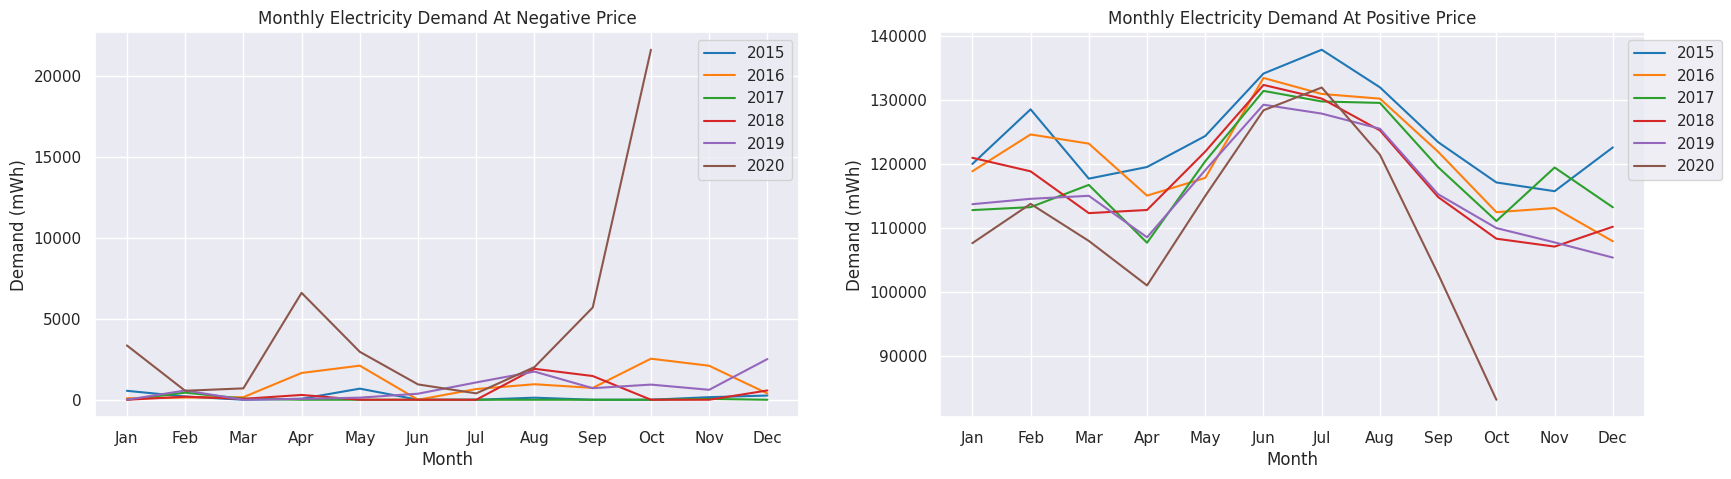

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
monthly_demand = df_1.groupby(['month', 'year'])['demand_neg_RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='month', y='demand_neg_RRP', hue='year', palette=colors, errorbar=None)
g.set_xticks(range(1, 13))
g.set_title('Monthly Electricity Demand At Negative Price')
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Demand (mWh)")
g.set_xlabel("Month")
g.legend(bbox_to_anchor= (1.,1))

plt.subplot(1,2,2)
df_1['RRP_negative_1']=df_1['RRP_negative']*-1
monthly_demand = df_1.groupby(['month', 'year'])['demand_pos_RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='month', y='demand_pos_RRP', hue='year', palette=colors, errorbar=None)
g.set_xticks(range(1, 13))
g.set_title('Monthly Electricity Demand At Positive Price')
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Demand (mWh)")
g.set_xlabel("Month")
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

Looking at the left chart, the demand at negative price increased in April followed by a peak in October, 2020. From 2015 to 2020, demand was relatively low through out the months.

Interestingly, we can see that in April and October 2020, where we observed the high demand at negative price (left chart), yet the demand at positive price was at its lowest (right chart).

Let's investigate the temperature variation of electricity price and its demand.



### Weather Variation: temperature/weather

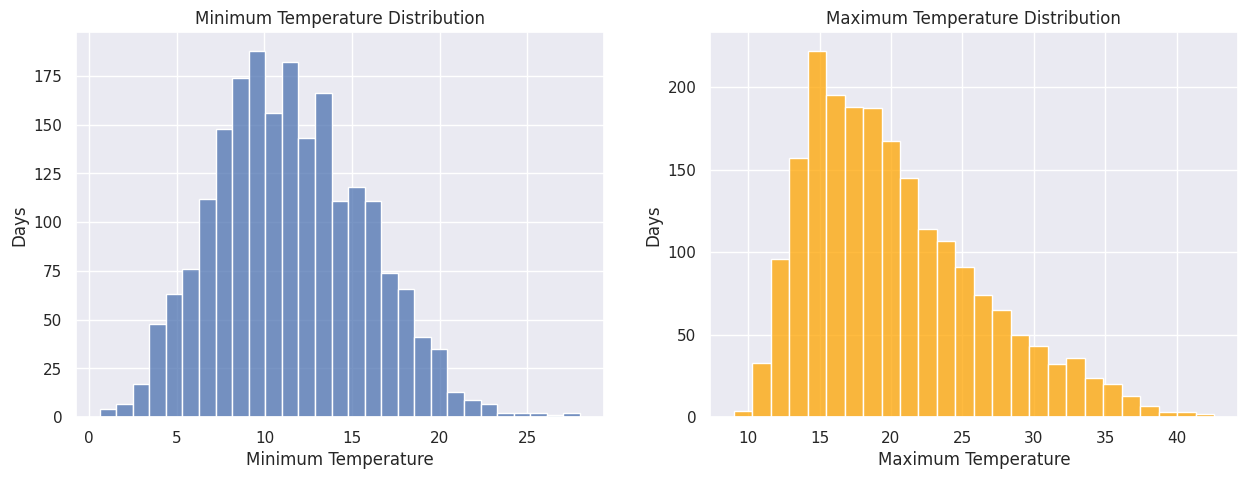

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
g1=sns.histplot(x=df_1['min_temperature'])
g1.set_title('Minimum Temperature Distribution')
g1.set_xlabel('Minimum Temperature')
g1.set_ylabel('Days')

plt.subplot(1,2,2)
g2=sns.histplot(x=df_1['max_temperature'], color='orange')
g2.set_title('Maximum Temperature Distribution')
g2.set_xlabel('Maximum Temperature')
g2.set_ylabel('Days')
plt.show()

Minimum temperatures were normally distributed in the dataset while maximum temperatures were slightly right-skewed indicating less days reached 40 degree celcius.
Let's find out how the temperature varies by month.

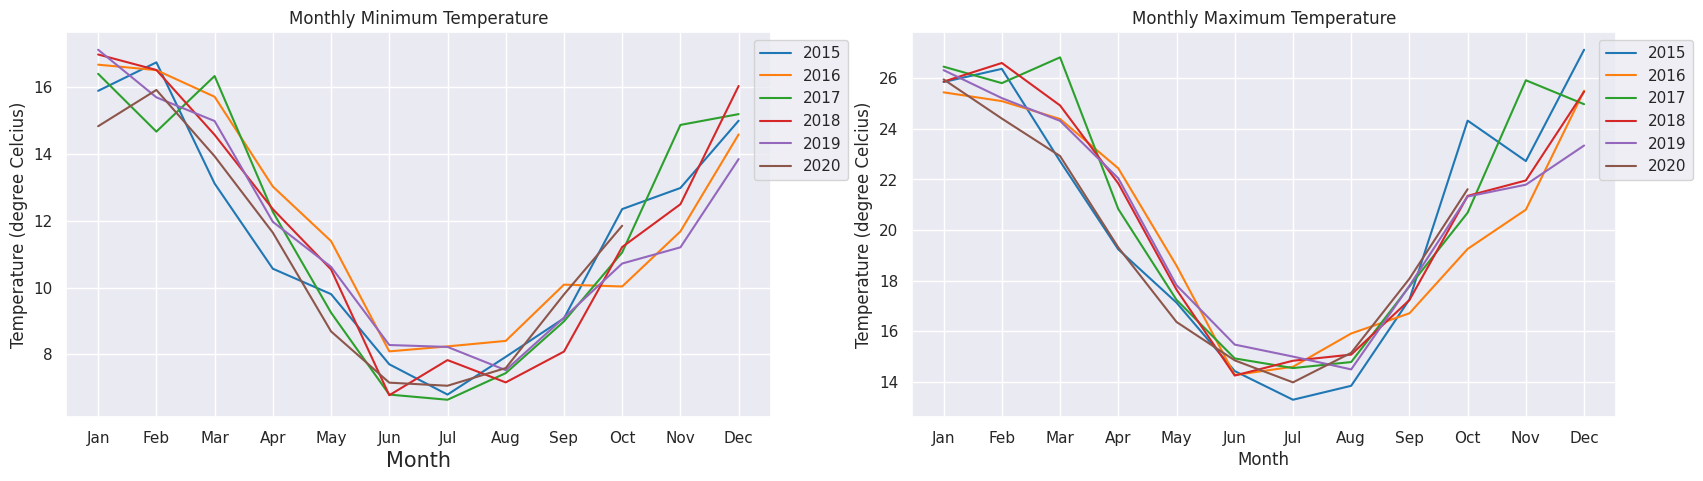

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
monthly_min_temp = df_1.groupby(['month', 'year'])['min_temperature'].mean().reset_index()
colors=sns.color_palette("tab10", n_colors=6)
g1=sns.lineplot(data=df_1, x='month', y='min_temperature', hue='year', palette=colors, errorbar=None)
g1.set_xticks(range(1, 13))
g1.set_title('Monthly Minimum Temperature')
g1.set_ylabel('Temperature (degree Celcius)')
g1.set_xlabel('Month', fontsize=15)
g1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g1.legend(bbox_to_anchor= (1.12,1))

plt.subplot(1,2,2)
Average_monthly_demand = df_1.groupby(['month', 'year'])['max_temperature'].mean().reset_index()
colors=sns.color_palette("tab10", n_colors=6)
g2=sns.lineplot(data=df_1, x='month', y='max_temperature', hue='year', palette=colors, errorbar=None)
g2.set_xticks(range(1, 13))
g2.set_title('Monthly Maximum Temperature')
g2.set_ylabel('Temperature (degree Celcius)')
g2.set_xlabel('Month')
g2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g2.legend(bbox_to_anchor= (1.12,1))
plt.show()

The temperature variation through out the year shared the same patterns with both minimum and maxmimum temperatures from 2015 to 2020.
To investigate deeper, we are going to divide the months into four seasons as follow:
- Summer: December - February
- Autumn: March - May
- Winter: June - August
- Spring: September - November

In [ ]:
def season(month):
    season_month = {12:'Summer', 1:'Summer', 2:'Summer',
                    3:'Autumn', 4:'Autumn', 5:'Autumn',
                    6:'Winter', 7:'Winter', 8:'Winter',
                    9:'Spring', 10:'Spring', 11:'Spring'}
    return season_month.get(month)

season_list = []
for month in df_1['month']:
    seasons = season(month)
    season_list.append(seasons)
df_1['season'] = season_list

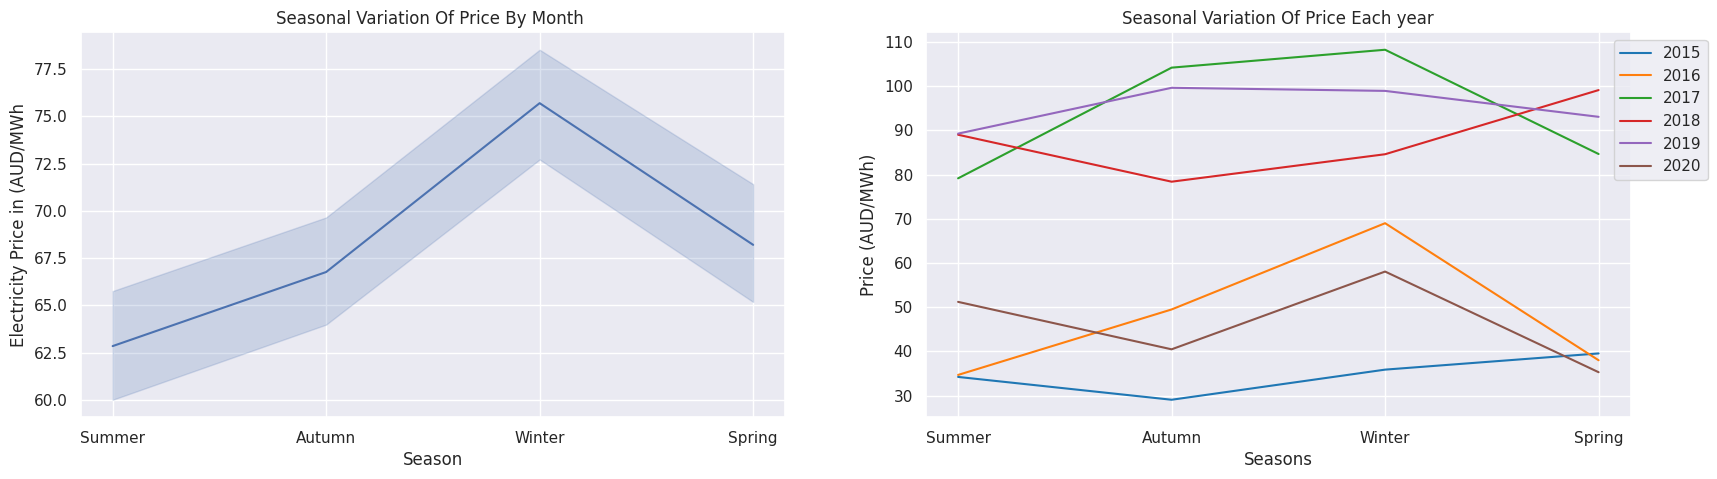

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='season', y='RRP')
g.set_ylabel('Electricity Price in (AUD/MWh')
g.set_title('Seasonal Variation Of Price By Month ')
g.set_xlabel('Season')
plt.subplot(1,2,2)
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='season', y='RRP', hue='year', palette=colors,errorbar=None)
g.legend(bbox_to_anchor= (1.12,1))
g.set_xlabel('Seasons')
g.set_ylabel('Price (AUD/MWh)')
g.set_title('Seasonal Variation Of Price Each year')
plt.show()

It appears that there was increasing prices from Summer to Autumn and peaked at `$75/mWh` in Winter, followed by a decline to around `$68/mWh` from Winter to Spring.

Price for electricity was low in 2015, 2016 (ranging from `$30-$70/mWh`) then significantly increased in 2018, 2019 ranging from `$80` to `$100/mWh`. Yet 2020 saw a decrease in price.



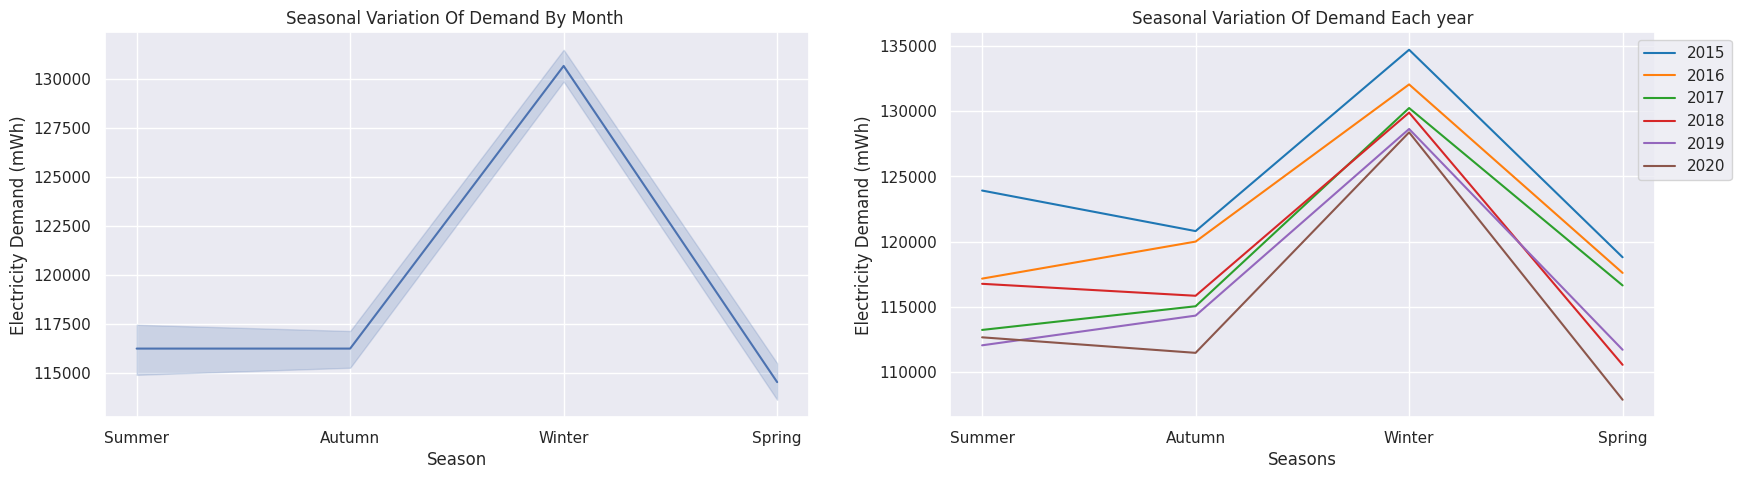

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='season', y='demand')
g.set_ylabel('Electricity Demand (mWh)')
g.set_title('Seasonal Variation Of Demand By Month ')
g.set_xlabel('Season')
plt.subplot(1,2,2)
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='season', y='demand', hue='year', palette=colors,errorbar=None  )
g.legend(bbox_to_anchor= (1.12,1))
g.set_xlabel('Seasons')
g.set_ylabel('Electricity Demand (mWh)')
g.set_title('Seasonal Variation Of Demand Each year')
plt.show()

Huge demand saw in Winter in all the years of the dataframe, this can be due to a high demand for heating systems because the Winter seasion in Victoria could get as cold as 2 - 10 degree Celcius during this time.

Again, we can clearly see that although the power compsumption trend looks the same from 2015 to 2020, the electricity demand was higher in 2015 declined over the year to 2020.  

### School Day Variation

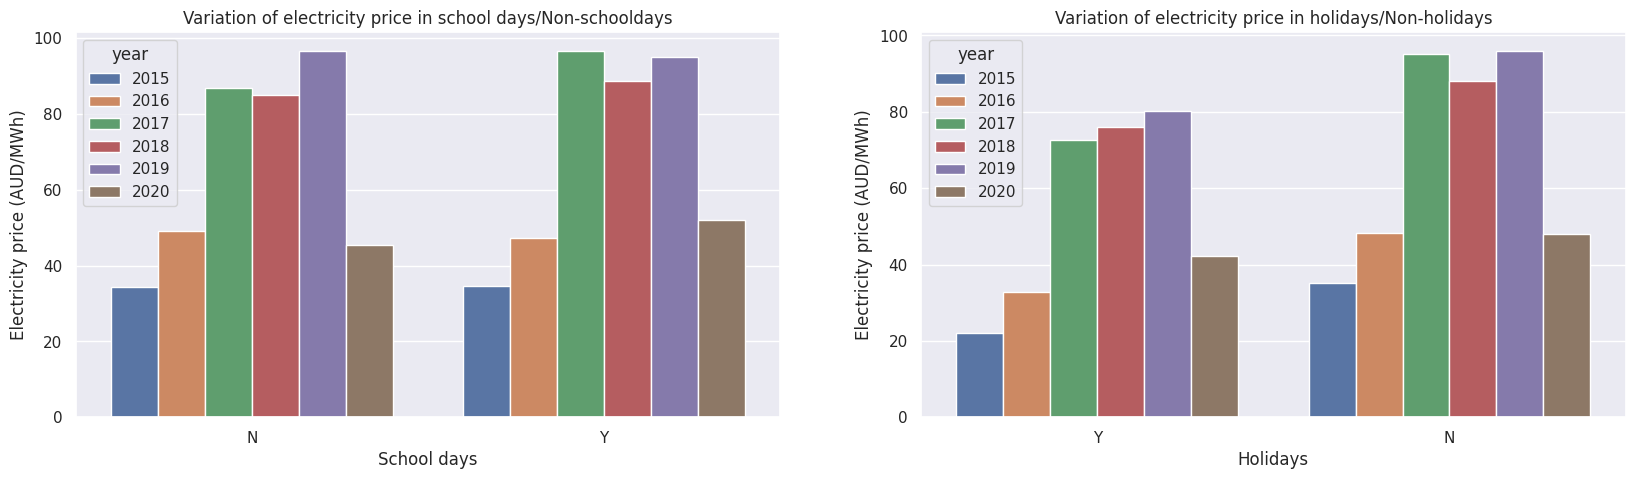

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g1=sns.barplot(data=df_1, x='school_day', y='RRP', hue='year', errorbar=None)
g1.set_title('Variation of electricity price in school days/Non-schooldays')
g1.set_xlabel('School days')
g1.set_ylabel('Electricity price (AUD/MWh)')

plt.subplot(1,2,2)
g2=sns.barplot(data=df_1, x='holiday', y='RRP', hue='year', errorbar=None)
g2.set_title('Variation of electricity price in holidays/Non-holidays')
g2.set_xlabel('Holidays')
g2.set_ylabel('Electricity price (AUD/MWh)')
plt.show()

School Day and Holidays do not seem to have influence on any trend in pricing, the above two bar charts show no particular trend, whether it is school day or holiday.

## Conclusion

This EDA highlights distinctive trends in the electricity market in Victoria, Australia (2015–2020). Seasonal patterns reveal increased demand during winters, linked to heating needs. Despite a consistent consumption trend, there's a declining yearly demand. Temperature emerges as a significant factor, peaking during Winter, impacting both demand and pricing. Prices showed a notable increase in 2018–2019, followed by a decrease in 2020.

Unexpectedly, school days and holidays did not notably influence electricity pricing, emphasizing the dominance of other factors.

An inverse relationship between demand and prices suggests potential correlations. Analysis of negative prices reveals an increasing trend, indicating surplus electricity.

In summary, the electricity market dynamics involve a complex combination of factors, including temperature, seasonality, and overall demand. Further exploration, considering economic conditions, energy policies, and technological advancements, could enhance understanding of the observed trends.